#                         COLEGIO DE CIENCIAS E INGENIERIA
##                                            INGENIERIA INDUSTRIAL

###                                                        IIN-3007 Analitica de Datos

###                                                                     NRC: 2209


###                                               NOMBRE DEL ENTREGABLE: Avance 1

###                                    SEMESTRE: Segundo Semestre 2023-2024 (202320)


####           NOMBRE(S) Y CÓDIGO DE ESTUDIANTE(S): Emilia Pavón 00323300, Belén Carrasco 00323335, Emily Alta 00324764
####                                                     PROFESOR(A): María Gabriela Baldeón Calisto
####                                                         FECHA DE ENTREGA: 01 de abril 2024

#### Importamos las librerias necesarias

In [1]:
#Importar todas las librerias necesarias
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt
%matplotlib inline
from pathlib import Path
!pip install dmba
import pandas as pd
from dmba import regressionSummary
import statsmodels.api as sm

### Importamos la data

In [2]:
df=pd.read_csv('PublicHospitalDataset - Copy.csv')
df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,725445.0,3,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,235422.0,0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,278207.0,3,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,22613.0,1,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,48161.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,37325.0,2,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,56478.0,0,0
5109,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,Female,44.0,77772.0,0,0
5110,1,No,Yes,children,Urban,90.51,31.0,formerly smoked,Female,33.0,18883.0,3,0


### Limpieza base de datos

#### Codificacion variables

| Variable          | Descripción                                    |
|-------------------|------------------------------------------------|
| Hypertension      | 1: Paciente tiene hipertensión                |
|                   | 0: Paciente no tiene hipertensión             |
| Heart Disease     | 1: Paciente tiene enfermedad cardiaca          |
|                   | 0: Paciente no tiene enfermedad cardiaca       |
| Married           | Yes: Paciente se ha casado                     |
|                   | No: Paciente no se ha casado                   |
| Work              | Children: Cuida niños                          |
|                   | Govt_jov: Trabaja en el gobierno              |
|                   | Never_worked: Nunca ha trabajado               |
|                   | Private: Trabaja en el sector privado          |
|                   | Self-employed: Trabajador por cuenta propia    |
| Residence         | Rural: Vive en área rural                      |
|                   | Urban: Vive en área urbana                      |
| Avg_glucose_level | Nivel de glucose promedio                      |
| Bmi               | Body mass index                                |
| Smoking           | Formerly smoked, never smoked, smokes, Unknown |
| Gender            | Male, Female, Other                            |
| Age               | Edad del paciente                              |
| Income            | Ingreso anual                                  |
| Children          | Número de hijos                                |
| Stroke            | 1: Paciente ha tendio ataque cerebral          |
|                   | 0: Paciente no ha tenido ataque cerebral      |

In [3]:
#Comprobamos valores atipicos en las variables categoricas
print("Valores en Hypertension:",df['Hypertension'].unique(),"\n")
print("Valores en Heart Disease:",df["Heart Disease"].unique(),"\n")
print("Valores en Married:",df["Married"].unique(),"\n")
print("Valores en Work:",df["Work"].unique(),"\n")
print("Valores en Residence:",df["Residence"].unique(),"\n")
print("Valores en Smoking:",df["Smoking"].unique(),"\n")
print("Valores en Gender:",df["Gender"].unique(),"\n")
print("Valores en Stroke:",df["Stroke"].unique(),"\n")

Valores en Hypertension: [0 1] 

Valores en Heart Disease: ['1' '0' 'No'] 

Valores en Married: ['Yes' 'No'] 

Valores en Work: ['Private' 'Self-employed' 'k–sdh-k' 'Govt_job' 'sdsd-i' 'children'
 'Never_worked' 'dsfsdf' 'sdfsdf'] 

Valores en Residence: ['Urban' 'Rural'] 

Valores en Smoking: ['formerly smoked' 'never smoked' 'smokes' 'Unknown' 'weed'] 

Valores en Gender: ['Male' 'Female' 'Other'] 

Valores en Stroke: [1 0] 



In [4]:
#Describimos la data numerica
# De esta manera comprobamos datos atipicos, y valores faltantes en cada columna 
df.describe()
#podemos ver un dato atipico en BMI, debido a que el valor maximo carece de sentido en la medida
# De igual manera, tenemos un alto grado de valores faltantes en BMI
#Existen valores faltantes en BMI y Income

,Hypertension,Avg_glucose_level,Bmi,Age,Income,Children,Stroke
count,5112.000000,5112.000000,4911.000000,5112.000000,5085.000000,5112.000000,5112.000000
mean,0.097613,106.141563,61.449277,43.222809,117056.740216,1.263693,0.048709
std,0.296820,45.275754,1140.430359,22.609043,87105.782585,1.186283,0.215280
min,0.000000,55.120000,10.300000,0.080000,0.000000,0.000000,0.000000
25%,0.000000,77.255000,23.500000,25.000000,44133.000000,0.000000,0.000000
50%,0.000000,91.865000,28.100000,45.000000,101997.000000,1.000000,0.000000
75%,0.000000,114.090000,33.100000,61.000000,183402.000000,2.000000,0.000000
max,1.000000,271.740000,40000.000000,82.000000,849615.000000,7.000000,1.000000


In [5]:
#Comprobamos el numero de valores nulos en cada columna 
print(df.isnull().sum())

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  201
Smoking                0
Gender                 0
Age                    0
Income                27
Children               0
Stroke                 0
dtype: int64


In [6]:
#Revisamos la froma de la base de datos
print(df.shape)

(5112, 13)


In [7]:
#Comprobamos el tipo de datos de cada columna
print(df.dtypes)
#(InteractiveChaos, 2018)

Hypertension           int64
Heart Disease         object
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                  float64
Income               float64
Children               int64
Stroke                 int64
dtype: object


In [8]:
#Estandarizamos el nombre de las columnas
df.columns = [s.strip().replace(' ', '_') for s in df.columns]
df.columns

Index(['Hypertension', 'Heart_Disease', 'Married', 'Work', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Smoking', 'Gender', 'Age', 'Income',
       'Children', 'Stroke'],
      dtype='object')

In [9]:
#Cambiamos los valores a categoricos, debido a que existen determinadas entradas de valores 
df.Hypertension = df.Hypertension.astype('category')
df.Heart_Disease=df.Heart_Disease.astype('category')
df.Married=df.Married.astype('category')
df.Work=df.Work.astype('category')
df.Residence=df.Residence.astype('category')
df.Gender=df.Gender.astype('category')
df.Stroke=df.Stroke.astype('category')
# Defining the values
ingreso_smoking = ['smokes','formerly smoked','never smoked', 'Unknown','weed']

# Defining income values as an ordinal categorical variable 
smoking_dtype = pd.api.types.CategoricalDtype(categories=ingreso_smoking, ordered=True)
df["Smoking"] = df["Smoking"].astype(smoking_dtype)
df.dtypes

Hypertension         category
Heart_Disease        category
Married              category
Work                 category
Residence            category
Avg_glucose_level     float64
Bmi                   float64
Smoking              category
Gender               category
Age                   float64
Income                float64
Children                int64
Stroke               category
dtype: object

## Limpieza de columnas

### Columna de "Smoking"

In [10]:
#Revisamos en que fila se encuentra el dato atipico
df[df["Smoking"]=="weed"]

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke
172,0,0,Yes,Private,Urban,97.43,26.4,weed,Female,60.0,36680.0,1,1


In [11]:
# Debido a la entrada atipica con valor "weed" al ser fumada e inhalada por los pulmones asumimos como "smokes"
df['Smoking'] = df['Smoking'].replace("weed", "smokes")
df.Smoking=df.Smoking.astype('string')
df.Smoking=df.Smoking.astype('category')
df.Smoking.unique()

['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']

### Columna "Heart_Disease" - Variables binarias

In [12]:
df[df["Heart_Disease"]=="No"]

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke
5110,1,No,Yes,children,Urban,90.51,31.0,formerly smoked,Female,33.0,18883.0,3,0


In [13]:
# Al ser una variable binaria y obtener un valor de "No" podemos asumir que es igual a 0
df['Heart_Disease'] = df['Heart_Disease'].replace("No", 0)
df.Heart_Disease=df.Heart_Disease.astype('string')
df.Heart_Disease=df.Heart_Disease.astype('category')
df.Heart_Disease.unique()

['1', '0']
Categories (2, object): ['0', '1']

### Columna "Works"-  Listwise Deletion 

In [14]:
#Revisamos filas con errores en work
works=["children","Govt_job","Never_worked","Private","Self-employed"]
df[~df["Work"].isin(works)]

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke
8,0,0,Yes,k–sdh-k,Rural,76.15,NaN,Unknown,Female,59.0,121499.0,3,1
64,0,0,Yes,k–sdh-k,Urban,104.72,NaN,Unknown,Male,75.0,105544.0,3,1
90,0,1,Yes,sdsd-i,Urban,226.98,29.8,never smoked,Female,79.0,180881.0,3,1
300,0,0,Yes,k–sdh-k,Urban,81.51,28.5,Unknown,Female,53.0,11650.0,2,0
806,0,0,Yes,k–sdh-k,Rural,114.32,26.4,never smoked,Male,39.0,92013.0,1,0
2787,0,0,Yes,dsfsdf,Rural,84.60,27.0,smokes,Female,42.0,442516.0,2,0
4832,0,0,No,sdfsdf,Urban,61.88,20.1,never smoked,Female,20.0,551530.0,2,0
5055,0,0,No,sdfsdf,Urban,92.06,25.3,smokes,Female,25.0,196052.0,2,0
5065,0,0,Yes,sdfsdf,Urban,89.01,37.4,never smoked,Female,31.0,596184.0,3,0
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81.0,NaN,2,0


In [15]:
#Eliminamos los registros de la columna work no registrados
df=df[df["Work"].isin(works)]
df.Work=df.Work.astype('string')
df.Work=df.Work.astype('category')
df.Work.unique()

C:\Users\Emilia\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']

### Valores nulos en la variable "Income" - Median substitution

In [16]:
df[df.Income.isnull()]

,Hypertension,Heart_Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke
20,0,0,Yes,Govt_job,Rural,193.94,22.4,smokes,Female,71.0,NaN,2,1
76,1,0,Yes,Private,Urban,240.09,27.0,never smoked,Male,80.0,NaN,1,1
139,0,0,Yes,Private,Rural,199.20,26.6,Unknown,Female,75.0,NaN,1,1
207,0,0,No,Self-employed,Urban,90.19,26.9,never smoked,Male,78.0,NaN,0,1
273,0,0,Yes,Private,Urban,109.82,23.7,never smoked,Female,59.0,NaN,3,0
317,1,0,Yes,Self-employed,Rural,127.71,36.0,never smoked,Female,37.0,NaN,3,0
369,0,0,No,children,Rural,93.25,16.6,Unknown,Female,4.0,NaN,0,0
562,0,0,No,children,Urban,58.26,16.5,Unknown,Female,1.8,NaN,0,0
623,0,0,Yes,Private,Rural,68.34,39.3,Unknown,Female,74.0,NaN,1,0
675,0,0,Yes,Govt_job,Rural,86.39,30.2,never smoked,Female,53.0,NaN,1,0


In [17]:
# Compute he median income
medianIncome = df['Income'].median()

# Fill nan values with the computed median
df.Income = df.Income.fillna(value=medianIncome)

C:\Users\Emilia\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
x=df.isnull().sum()
print(x)

Hypertension           0
Heart_Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  199
Smoking                0
Gender                 0
Age                    0
Income                 0
Children               0
Stroke                 0
dtype: int64


### Valores atipicos en la variable "BMI" - Listwise Deletion 

In [19]:
# Calcular la media y la desviación estándar de 'Bmi'
mean = df['Bmi'].mean()
std_dev = df['Bmi'].std()

# Definir los límites para detectar valores atípicos
limites = (mean - 3 * std_dev, mean + 3 * std_dev)

# Identificar los valores atípicos 
outliers_mask = (df['Bmi'] < limites[0]) | (df['Bmi'] > limites[1])
atipicos = df.loc[outliers_mask, 'Bmi']

# Imprimir los valores atípicos
print("Valores atípicos en 'Bmi':")
print(atipicos)

Valores atípicos en 'Bmi':
4594    40000.0
4661    40000.0
4774    40000.0
4822    40000.0
Name: Bmi, dtype: float64


In [20]:
#Pasamos los valores atipicos a nulos
df.loc[atipicos.index, 'Bmi'] = np.nan #(InteractiveChaos,2021)

C:\Users\Emilia\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


### Valores nulos en la variable "BMI" - Regresion Imputation

In [21]:
df_regression=df[df["Bmi"].notnull()]
predictors = ['Hypertension', 'Heart_Disease', 'Married', 'Work', 'Residence',
       'Avg_glucose_level', 'Smoking', 'Gender', 'Age', 'Income',
       'Children']

outcome = 'Bmi'

X = pd.get_dummies(df_regression[predictors], drop_first=True).astype(float)

y = df_regression[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

train2_X = sm.add_constant(train_X)
#Inicializamos el modelo
model=sm.OLS(train_y, train2_X)
#Ajusta el modelo al sel que envie
results=model.fit()

print(results.summary())

C:\Users\Emilia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    Bmi   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     57.57
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          6.50e-169
Time:                        21:12:48   Log-Likelihood:                -9796.2
No. Observations:                2939   AIC:                         1.963e+04
Df Residuals:                    2921   BIC:                         1.974e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [22]:
# Obtener las filas con valores nulos en la columna 'Bmi'
df_nulos = df[df["Bmi"].isnull()]

# Obtener las características para predecir los valores de 'Bmi' en las filas con valores nulos
X_nulos = pd.get_dummies(df_nulos[predictors], drop_first=True)

# Agregar la constante al conjunto de características
X_nulos = sm.add_constant(X_nulos)

# Predecir los valores de 'Bmi' para las filas con valores nulos
predicciones = results.predict(X_nulos)

# Llenar los valores nulos en la columna 'Bmi' con las predicciones
df.loc[df["Bmi"].isnull(), "Bmi"] = predicciones

# Verificar que no hay más valores nulos en la columna 'Bmi'
print(df['Bmi'].isnull().sum())

C:\Users\Emilia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0


C:\Users\Emilia\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# Correleacion variables predictivas

In [23]:
x=df.columns
df_encoded = pd.get_dummies(df, drop_first=True)
# Calcular la matriz de correlación para el DataFrame codificado
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                         Avg_glucose_level       Bmi       Age    Income  \
Avg_glucose_level                 1.000000  0.180498  0.237565  0.025029   
Bmi                               0.180498  1.000000  0.336325  0.120150   
Age                               0.237565  0.336325  1.000000  0.181037   
Income                            0.025029  0.120150  0.181037  1.000000   
Children                          0.055252  0.200437  0.345121  0.107197   
Hypertension_1                    0.174300  0.173112  0.276396  0.022047   
Heart_Disease_1                   0.159999  0.041701  0.263324  0.061446   
Married_Yes                       0.154700  0.344433  0.678899  0.161285   
Work_Never_worked                -0.014681 -0.028917 -0.078675 -0.060718   
Work_Private                      0.016604  0.208588  0.117047  0.270487   
Work_Self-employed                0.062938  0.073264  0.327893 -0.009089   
Work_children                    -0.102446 -0.453277 -0.634447 -0.276386   
Residence_Ur

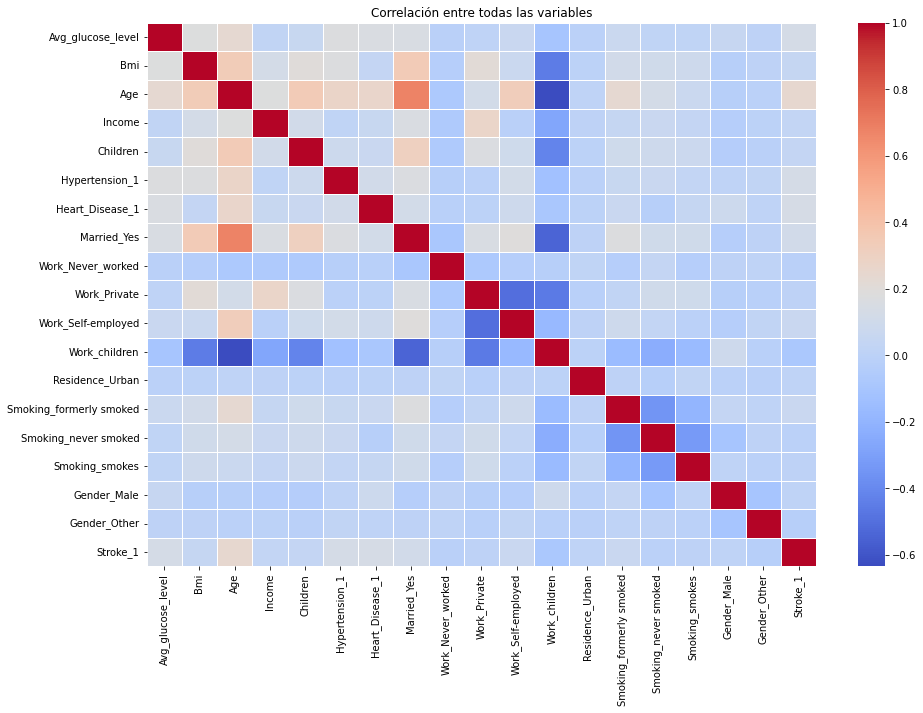

In [24]:
import seaborn as sns
# Visualización de la matriz de correlación con un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title("Correlación entre todas las variables")
plt.show()

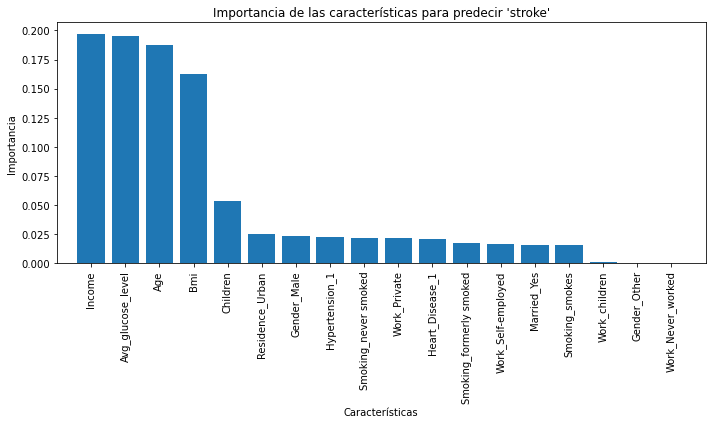

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# Eliminamos la variable de respuesta del conjunto de características
X = df_encoded.drop('Stroke_1', axis=1)

# Variable de respuesta
y = df_encoded['Stroke_1']

# Creamos el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo
model.fit(X, y)

# Extraemos la importancia de las características
importances = model.feature_importances_

# Ordenamos las importancias de mayor a menor
indices = np.argsort(importances)[::-1]

# Obtener nombres de las características
feature_names = X.columns

# Graficar
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características para predecir 'stroke'")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()
# Variable de respuesta

# Visualizacion de datos

### Revisar el balance de nuestra variable de respuesta

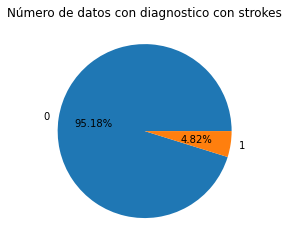

Stroke
0    4856
1     246
dtype: int64


In [26]:
# Agrupamos por la columna "Stroke" y contamos el número de filas en cada grupo
grouped_df = df.groupby(by="Stroke").size()

# Creamos un gráfico de pastel utilizando los datos agrupados
plt.pie(grouped_df, labels=grouped_df.index, autopct="%.2f%%")
plt.title("Número de datos con diagnostico con strokes")
plt.show()
print(grouped_df)

### Visualizacion de hypertension

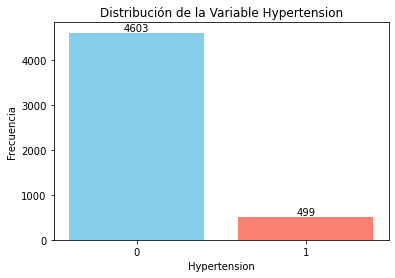

In [27]:
# Contar la frecuencia de cada valor en la columna "Hypertension"
conteo_hipertension = df['Hypertension'].value_counts()

# Definir colores para las barras
colores = ['skyblue', 'salmon']

# Crear el gráfico de barras con colores personalizados
plt.bar(conteo_hipertension.index, conteo_hipertension.values, color=colores)

# Establecer los límites del eje x y especificar las etiquetas
plt.xticks([0, 1])

# Añadir etiquetas de valores a las barras
for i, valor in enumerate(conteo_hipertension.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Hypertension')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable Hypertension')

# Mostrar el gráfico
plt.show()


### Visualizacion Heart_Disease

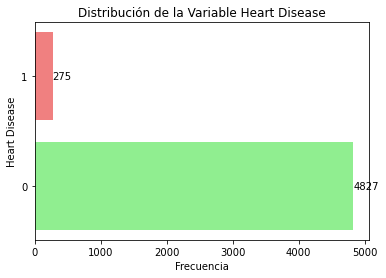

In [28]:
# Contar la frecuencia de cada valor en la columna "Heart_Disease"
conteo_enfermedad_cardiaca = df['Heart_Disease'].value_counts()

# Definir colores para las barras
colores = ['lightgreen', 'lightcoral']

# Crear el gráfico de barras con colores personalizados
plt.barh(conteo_enfermedad_cardiaca.index, conteo_enfermedad_cardiaca.values, color=colores)

# Añadir etiquetas de valores a las barras
for i, valor in enumerate(conteo_enfermedad_cardiaca.values):
    plt.text(valor, i, str(valor), ha='left', va='center')

# Añadir etiquetas y título
plt.ylabel('Heart Disease')
plt.xlabel('Frecuencia')
plt.title('Distribución de la Variable Heart Disease')

# Mostrar el gráfico
plt.show()

### Visualizacion de Married

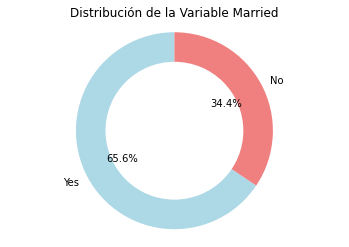

In [29]:

# Contar la frecuencia de cada valor en la columna "Married"
conteo_casado = df['Married'].value_counts()

# Definir colores para las secciones del gráfico de dona
colores = ['lightblue', 'lightcoral']

# Crear el gráfico de dona
plt.pie(conteo_casado, labels=conteo_casado.index, colors=colores, autopct='%1.1f%%', startangle=90)

# Añadir un círculo en el centro para convertirlo en un gráfico de dona
circulo_central = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(circulo_central)

# Añadir título
plt.title('Distribución de la Variable Married')

# Mostrar el gráfico
plt.axis('equal')
plt.show()

### Visualizacion Work

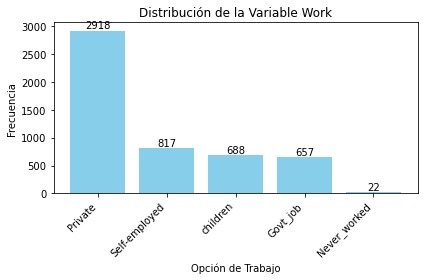

In [30]:
# Contar la frecuencia de cada opción en la columna "Work"
conteo_trabajo = df['Work'].value_counts()

# Crear el gráfico de barras
plt.bar(conteo_trabajo.index, conteo_trabajo.values, color='skyblue')

# Añadir etiquetas de valores a las barras
for i, valor in enumerate(conteo_trabajo.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Opción de Trabajo')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable Work')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Visualizacion residence

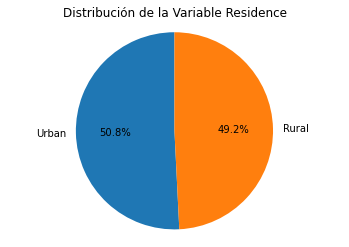

In [31]:

# Contar la frecuencia de cada opción en la columna "Residence"
conteo_residencia = df['Residence'].value_counts()

# Crear el gráfico de pie
plt.pie(conteo_residencia, labels=conteo_residencia.index, autopct='%1.1f%%', startangle=90)

# Añadir título
plt.title('Distribución de la Variable Residence')

# Mostrar el gráfico
plt.axis('equal')
plt.show()

### Variable Avg_glucose_level

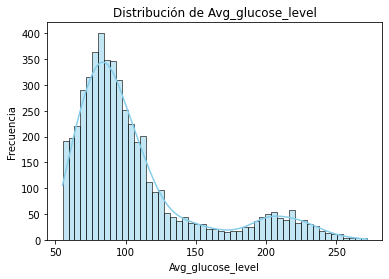

In [32]:
# Crear el gráfico de distribución utilizando seaborn
sns.histplot(df['Avg_glucose_level'], kde=True, color='skyblue')

# Añadir título y etiquetas
plt.title('Distribución de Avg_glucose_level')
plt.xlabel('Avg_glucose_level')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### Variable BMI

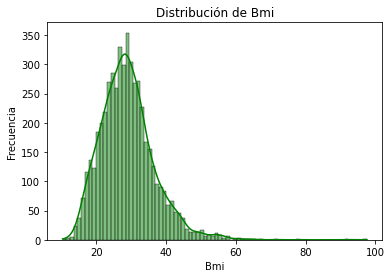

In [33]:
# Crear el gráfico de distribución utilizando seaborn
sns.histplot(df['Bmi'], kde=True, color='green')

# Añadir título y etiquetas
plt.title('Distribución de Bmi')
plt.xlabel('Bmi')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### Variable Smoking

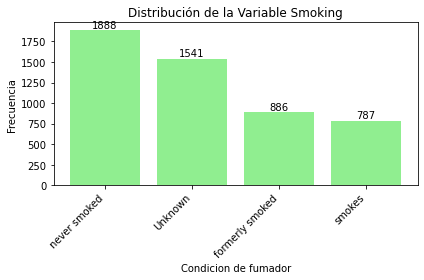

In [34]:
# Contar la frecuencia de cada opción en la columna "Work"
conteo_trabajo = df['Smoking'].value_counts()

# Crear el gráfico de barras
plt.bar(conteo_trabajo.index, conteo_trabajo.values, color='lightgreen')

# Añadir etiquetas de valores a las barras
for i, valor in enumerate(conteo_trabajo.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Condicion de fumador')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable Smoking')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### variable gender

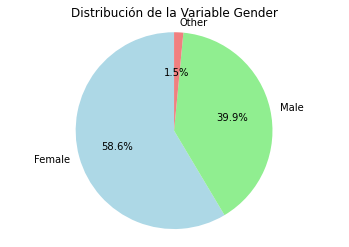

In [35]:
# Contar la frecuencia de cada opción en la columna "Gender"
conteo_residencia = df['Gender'].value_counts()
# Definir colores personalizados
colores = ['lightblue', 'lightgreen', 'lightcoral']
# Crear el gráfico de pie
plt.pie(conteo_residencia, labels=conteo_residencia.index, autopct='%1.1f%%', startangle=90, colors=colores)

# Añadir título
plt.title('Distribución de la Variable Gender')

# Mostrar el gráfico
plt.axis('equal')
plt.show()

### Variable Age

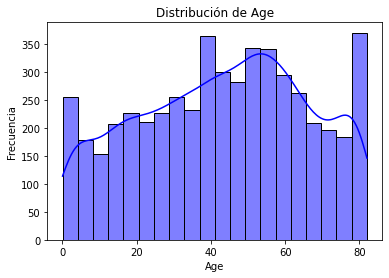

In [36]:
# Crear el gráfico de distribución utilizando seaborn
sns.histplot(df['Age'], kde=True, color='blue')

# Añadir título y etiquetas
plt.title('Distribución de Age')
plt.xlabel('Age')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### Variable income

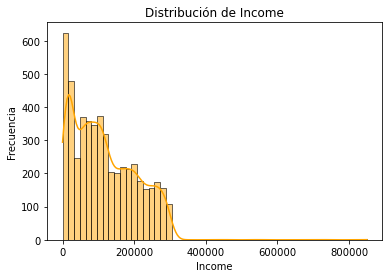

In [37]:
# Crear el gráfico de distribución utilizando seaborn
sns.histplot(df['Income'], kde=True, color='orange')

# Añadir título y etiquetas
plt.title('Distribución de Income')
plt.xlabel('Income')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

### Variable Children

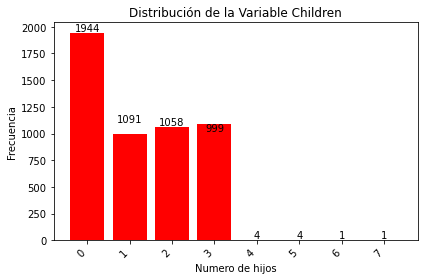

In [38]:
# Contar la frecuencia de cada opción en la columna "Work"
conteo_trabajo = df['Children'].value_counts()

# Crear el gráfico de barras
plt.bar(conteo_trabajo.index, conteo_trabajo.values, color='red')

# Añadir etiquetas de valores a las barras
for i, valor in enumerate(conteo_trabajo.values):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Añadir etiquetas y título
plt.xlabel('Numero de hijos')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Variable Children')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Relacion entre heart disease y hypertension 

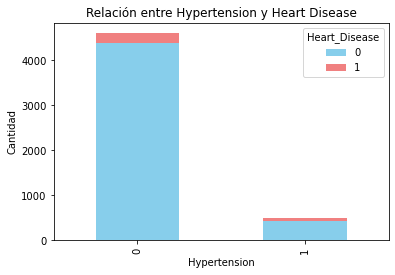

In [39]:
# Crear un DataFrame con las variables de interés
df_relacion = df[['Hypertension', 'Heart_Disease']]

# Calcular la frecuencia de combinaciones de valores
conteo_relacion = df_relacion.groupby(['Hypertension', 'Heart_Disease']).size().unstack()

# Crear el gráfico de barras apiladas
conteo_relacion.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])

# Añadir título y etiquetas
plt.title('Relación entre Hypertension y Heart Disease')
plt.xlabel('Hypertension')
plt.ylabel('Cantidad')
# Mostrar el gráfico
plt.show()

## Partición
#### Entrenamiento 75%, validación 10% y prueba 15%
##### (Camacho et al., 2024)

In [40]:
#Se crea una lista llamada predictors que contiene las variables predictivas 
predictors = ['Hypertension', 'Heart_Disease', 'Married', 'Work', 'Residence',
       'Avg_glucose_level','Bmi', 'Smoking', 'Gender', 'Age', 'Income',
       'Children']
#Se crea define la variable que se desea predecir 
outcome = 'Stroke'
#Se crean dos conjuntos de datos 
#Contiene las caractericticas o las variables predictores del dataframe
X = df[predictors]
#Contiene la variable resultado 
y = df[outcome]
#División de datos en un conjunto de entrenamiento, validación y prueba
#Random_state se utiliza para garantizar la reproducibilidad de la división de datos
#Se divide el 75% en set de entrenamiento (X_train), y el 25% restante se guarda en X_temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=1)
#Se divide X_temp en conjuntos de validacion (X_valid) con el 10% y en prueba (X_test) con 15%
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=1)
#Impresion de tamaños de los conjuntos 
print('Set de entrenamiento   : ', X_train.shape)
print('Set de validacion      : ', X_valid.shape)
print('Set de prueba          : ', X_test.shape)

Set de entrenamiento   :  (3826, 12)
Set de validacion      :  (510, 12)
Set de prueba          :  (766, 12)


## Oversampling

In [41]:
from sklearn.utils import resample

# Separar las clases minoritarias y mayoritarias
minority_class = df[df['Stroke'] == 1]
majority_class = df[df['Stroke'] == 0]

# Aplicar sobremuestreo a la clase minoritaria
minority_upsampled = resample(minority_class,
                               replace=True,  # muestreo con reemplazo
                               n_samples=len(majority_class),  # igualar tamaño con la clase mayoritaria
                               random_state=42)  # reproducibilidad

# Combinar la clase mayoritaria con la clase minoritaria sobremuestreada
df_oversampled = pd.concat([majority_class, minority_upsampled])

# Visualizar la distribución de clases después del sobremuestreo
print(df_oversampled['Stroke'].value_counts())

#(Imbalanced Learn, s. f.)

0    4856
1    4856
Name: Stroke, dtype: int64


## Undersampling

In [42]:
from sklearn.utils import resample

# Separar las clases minoritarias y mayoritarias
minority_class = df[df['Stroke'] == 1]
majority_class = df[df['Stroke'] == 0]

# Aplicar submuestreo a la clase mayoritaria
majority_downsampled = resample(majority_class,
                                 replace=False,  # muestreo sin reemplazo
                                 n_samples=len(minority_class),  # igualar tamaño con la clase minoritaria
                                 random_state=42)  # reproducibilidad

# Combinar la clase minoritaria con la clase mayoritaria submuestreada
df_undersampled = pd.concat([minority_class, majority_downsampled])

# Visualizar la distribución de clases después del submuestreo
print(df_undersampled['Stroke'].value_counts())

#(Imbalanced Learn, s. f.)

0    246
1    246
Name: Stroke, dtype: int64


## Estadísticas de cada modelo

In [43]:
# Separar las características 
X_oversampled = df_oversampled.drop('Stroke', axis=1)
y_oversampled = df_oversampled['Stroke']
X_undersampled =df_undersampled.drop('Stroke', axis=1)
y_undersampled = df_undersampled['Stroke']
# Importar las librerías necesarias
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Definir el modelo de clasificación
model = LogisticRegression()

# Definir métricas de evaluación
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
#accuracy: mide la frecuencia con la que un modelo predice correctamente el resultado.
#precision: mide la exactitud de las predicciones positivas realizadas por el modelo.
#recall: mide la capacidad del modelo para identificar correctamente instancias positivas.
#f1: combina precisión y recall en una sola métrica.
#roc_auc: mide el rendimiento de un modelo de clasificación binaria trazando la tasa de verdaderos positivos frente a 
#la tasa de falsos positivos en varios umbrales de clasificación.

# Definir las columnas numéricas y categóricas
numeric_features = ['Avg_glucose_level', 'Bmi', 'Age', 'Income', 'Children']
categorical_features = ['Hypertension', 'Heart_Disease', 'Married', 'Work', 'Residence', 'Smoking', 'Gender']

# Construir un preprocesador para escalar características numéricas y codificar características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Construir el pipeline del modelo con preprocesamiento y modelo de clasificación
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Evaluar el modelo con oversampling utilizando validación cruzada
oversampling_scores = cross_validate(pipeline, X_oversampled, y_oversampled, cv=5, scoring=scoring)

# Evaluar el modelo con undersampling utilizando validación cruzada
undersampling_scores = cross_validate(pipeline, X_undersampled, y_undersampled, cv=5, scoring=scoring)

# Imprimir resultados de oversampling
print("Resultados de Oversampling:")
for metric_name, scores in oversampling_scores.items():
    print(f"{metric_name}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

# Imprimir resultados de undersampling
print("\nResultados de Undersampling:")
for metric_name, scores in undersampling_scores.items():
    print(f"{metric_name}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")
    
#(Brownlee, 2020)
#(EvidentlyAI, s. f.)
#(Saini, 2023)

Resultados de Oversampling:
fit_time: 0.06 (+/- 0.02)
score_time: 0.05 (+/- 0.01)
test_accuracy: 0.78 (+/- 0.03)
test_precision: 0.76 (+/- 0.02)
test_recall: 0.82 (+/- 0.03)
test_f1: 0.79 (+/- 0.02)
test_roc_auc: 0.85 (+/- 0.02)

Resultados de Undersampling:
fit_time: 0.02 (+/- 0.00)
score_time: 0.03 (+/- 0.00)
test_accuracy: 0.80 (+/- 0.02)
test_precision: 0.79 (+/- 0.07)
test_recall: 0.82 (+/- 0.10)
test_f1: 0.80 (+/- 0.02)
test_roc_auc: 0.86 (+/- 0.05)


# Prueba estadística

- Hipótesis nula (Ho): No hay diferencia significativa entre los métodos de muestreo en términos de la métrica evaluada.
- Hipótesis alternativa (Ha): Hay una diferencia significativa entre los métodos de muestreo en términos de la métrica evaluada.

In [44]:
from scipy.stats import wilcoxon

# Métricas de oversampling y undersampling
oversampling_metric = oversampling_scores['test_accuracy']
undersampling_metric = undersampling_scores['test_accuracy']

# Wilcoxon pareada
stat, p_value = wilcoxon(oversampling_metric, undersampling_metric)

# Imprimir el resultado de la prueba
print("Prueba de Wilcoxon pareada:")
print(f"Estadística de prueba: {stat}")
print(f"Valor p: {p_value}")

# Interpretar el resultado
if p_value < 0.05:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para decir que hay una diferencia significativa entre los métodos de muestreo.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para decir que hay una diferencia significativa entre los métodos de muestreo.")


Prueba de Wilcoxon pareada:
Estadística de prueba: 0.0
Valor p: 0.0625
No se rechaza la hipótesis nula. No hay suficiente evidencia para decir que hay una diferencia significativa entre los métodos de muestreo.


# Modelo de regresión categórica

In [45]:
pip install mord

Note: you may need to restart the kernel to use updated packages.


In [46]:
df_undersampled = pd.get_dummies(df_undersampled, prefix_sep='_', drop_first=True)
df_undersampled
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from mord import LogisticIT
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score


In [47]:
y = df_undersampled['Stroke_1']
 
X = df_undersampled.drop(columns=['Stroke_1'])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=1)

print('Set de entrenamiento   : ', X_train.shape)
print('Set de validacion      : ', X_valid.shape)
print('Set de prueba          : ', X_test.shape)

Set de entrenamiento   :  (369, 18)
Set de validacion      :  (49, 18)
Set de prueba          :  (74, 18)


In [48]:
# fit a logistic regression
# penalty= penalty for coefficient values ("l1", "l2", None)
logit_reg = LogisticRegression(penalty= None, solver='newton-cg')
logit_reg.fit(X_train, y_train)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())

intercept  -6.438092025376312
       Avg_glucose_level      Bmi     Age        Income  Children  \
coeff           0.004423  0.01586  0.0949 -2.495283e-07 -0.137489   

       Hypertension_1  Heart_Disease_1  Married_Yes  Work_Never_worked  \
coeff        0.401861         0.820359    -0.230908                0.0   

       Work_Private  Work_Self-employed  Work_children  Residence_Urban  \
coeff      0.359238            0.615236        1.65494         0.187067   

       Smoking_formerly smoked  Smoking_never smoked  Smoking_smokes  \
coeff                 0.791857             -0.138857         0.42182   

       Gender_Male  Gender_Other  
coeff    -0.456813     -4.116319  


C:\Users\Emilia\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Emilia\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Emilia\anaconda3\lib\site-packages\sklearn\utils\optimize.py:246: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [49]:
# Predict the classes from the validation set
# A default probability threshold of 0.5 is used
logit_reg_pred = logit_reg.predict(X_valid)

# Returns the probabilities of the validation set
# Returns an array with size (num observations, num classes)
logit_reg_proba = logit_reg.predict_proba(X_valid)


logit_result = pd.DataFrame({'actual': y_valid, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

logit_result
#(Martín-Baos, García-Ródenas, & Rodriguez-Benitez, 2021)

,actual,p(0),p(1),predicted
175,1,0.124959,0.875041,1
200,1,0.231050,0.768950,1
1307,0,0.960827,0.039173,0
188,1,0.088346,0.911654,1
1443,0,0.114566,0.885434,1
1792,0,0.933357,0.066643,0
1093,0,0.986061,0.013939,0
35,1,0.011534,0.988466,1
5049,0,0.899233,0.100767,0
4901,0,0.979950,0.020050,0


In [50]:
classificationSummary(y_train, logit_reg.predict(X_train))
classificationSummary(y_valid, logit_reg.predict(X_valid))
# (Pierian Training, 2023)

Confusion Matrix (Accuracy 0.8130)

       Prediction
Actual   0   1
     0 137  39
     1  30 163
Confusion Matrix (Accuracy 0.7755)

       Prediction
Actual  0  1
     0 20  6
     1  5 18


Métricas para el conjunto de entrenamiento:
Matriz de confusión:
[[137  39]
 [ 30 163]]

Exactitud: 0.8130081300813008
Precisión: 0.806930693069307
Sensibilidad (Recall): 0.844559585492228
Especificidad: 0.7784090909090909
AUC: 0.8940767781441357


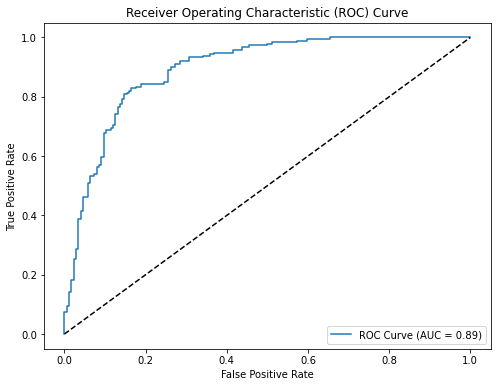


Métricas para el conjunto de validación:
Matriz de confusión:
[[20  6]
 [ 5 18]]

Exactitud: 0.7755102040816326
Precisión: 0.75
Sensibilidad (Recall): 0.782608695652174
Especificidad: 0.7692307692307693
AUC: 0.8461538461538463


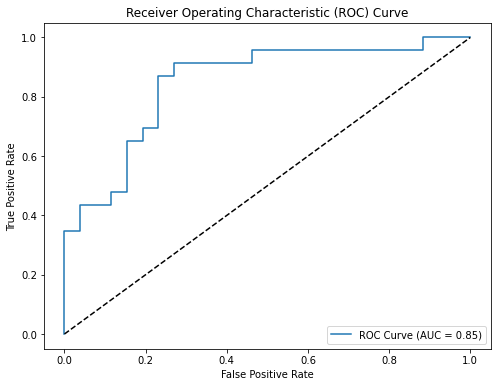


Métricas para el conjunto de prueba:
Matriz de confusión:
[[34 10]
 [ 7 23]]

Exactitud: 0.7702702702702703
Precisión: 0.696969696969697
Sensibilidad (Recall): 0.7666666666666667
Especificidad: 0.7727272727272727
AUC: 0.8545454545454545


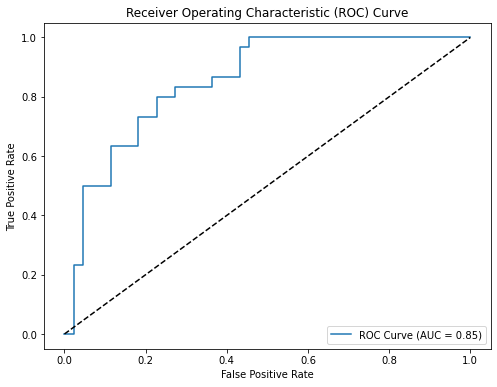

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

# Matriz de confusión
def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print("Matriz de confusión:")
    print(cm)

# Métricas de evaluación
def display_evaluation_metrics(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba[:, 1])
    print("\nExactitud:", accuracy)
    print("Precisión:", precision)
    print("Sensibilidad (Recall):", recall)
    print("Especificidad:", recall_score(y_true, y_pred, pos_label=0))
    print("AUC:", roc_auc)

# Curva ROC
def display_roc_curve(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_true, y_proba[:, 1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Calcular y mostrar métricas para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
display_confusion_matrix(y_train, logit_reg.predict(X_train))
display_evaluation_metrics(y_train, logit_reg.predict(X_train), logit_reg.predict_proba(X_train))
display_roc_curve(y_train, logit_reg.predict_proba(X_train))

# Calcular y mostrar métricas para el conjunto de validación
print("\nMétricas para el conjunto de validación:")
display_confusion_matrix(y_valid, logit_reg.predict(X_valid))
display_evaluation_metrics(y_valid, logit_reg.predict(X_valid), logit_reg.predict_proba(X_valid))
display_roc_curve(y_valid, logit_reg.predict_proba(X_valid))

# Calcular y mostrar métricas para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
display_confusion_matrix(y_test, logit_reg.predict(X_test))
display_evaluation_metrics(y_test, logit_reg.predict(X_test), logit_reg.predict_proba(X_test))
display_roc_curve(y_test, logit_reg.predict_proba(X_test))


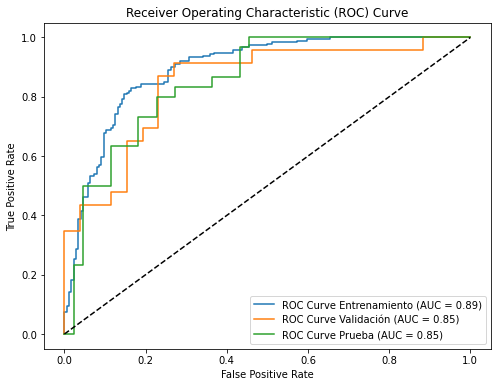

In [52]:
# Curva ROC para múltiples conjuntos de datos
def display_roc_curve_multi(y_true_list, y_proba_list, labels):
    plt.figure(figsize=(8, 6))
    for y_true, y_proba, label in zip(y_true_list, y_proba_list, labels):
        fpr, tpr, thresholds = roc_curve(y_true, y_proba[:, 1])
        plt.plot(fpr, tpr, label='ROC Curve {} (AUC = {:.2f})'.format(label, roc_auc_score(y_true, y_proba[:, 1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Llamada a la función para mostrar la curva ROC para los conjuntos de entrenamiento, validación y prueba
display_roc_curve_multi([y_train, y_valid, y_test], [logit_reg.predict_proba(X_train), logit_reg.predict_proba(X_valid), logit_reg.predict_proba(X_test)], ['Entrenamiento', 'Validación', 'Prueba'])


In [53]:
recallE_RC= round(recall_score(y_train, logit_reg.predict(X_train)), 3)
recallV_RC = round(recall_score(y_valid, logit_reg.predict(X_valid)), 3)
recallT_RC = round(recall_score(y_test, logit_reg.predict(X_test)), 3)

In [54]:
print(recallE_RC, recallV_RC, recallT_RC)

0.845 0.783 0.767


## K nearnest neighbor  - Optimizacion de Hiperparametros

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

C:\Users\Emilia\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Emilia\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


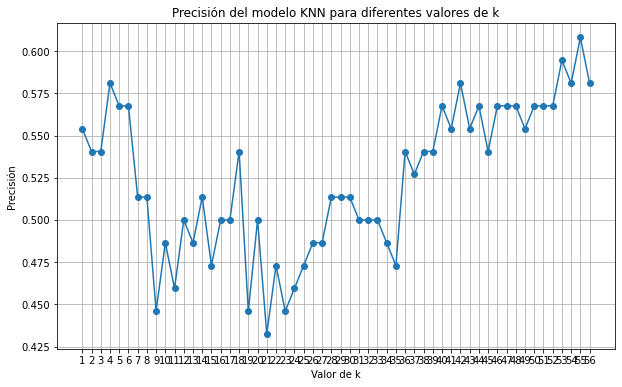

In [56]:
k_values = range(1, 57)

# Lista para almacenar las precisiones para cada valor de k
accuracies = []

# Iterar sobre los valores de k
for k in k_values:
    # Inicializar el clasificador KNN con el valor de k actual
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    knn.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test)
    
    # Calcular la precisión del modelo y agregarla a la lista de precisión
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Precisión del modelo KNN para diferentes valores de k')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de parámetros a explorar
param_grid = {'n_neighbors': range(1, 85),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 20, 30],
              'metric': ['euclidean', 'manhattan']}
# Donde P1 = Distancia de manhatan 
# Donde P2= Distancia Euclidiana
# Inicializar el clasificador KNN
knn = KNeighborsClassifier()

# Inicializar GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
#Mediante validacion cruzada
# Ajustar GridSearchCV a los datos
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)
# (Kang) (Scikit Learn)

Mejores parámetros: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 25, 'weights': 'uniform'}
Mejor precisión: 0.6206219918548685



Conjunto de entrenamiento:
Matriz de confusión:
[[ 94  82]
 [ 57 136]]
Exactitud: 0.6233062330623306
Precisión: 0.6238532110091743
Sensibilidad (Recall): 0.7046632124352331
Especificidad: 0.5340909090909091
AUC: 0.6521137541215261

Conjunto de validación:
Matriz de confusión:
[[ 9 17]
 [11 12]]
Exactitud: 0.42857142857142855
Precisión: 0.41379310344827586
Sensibilidad (Recall): 0.5217391304347826
Especificidad: 0.34615384615384615
AUC: 0.47909698996655514

Conjunto de prueba:
Matriz de confusión:
[[20 24]
 [14 16]]
Exactitud: 0.4864864864864865
Precisión: 0.4
Sensibilidad (Recall): 0.5333333333333333
Especificidad: 0.45454545454545453
AUC: 0.49356060606060603


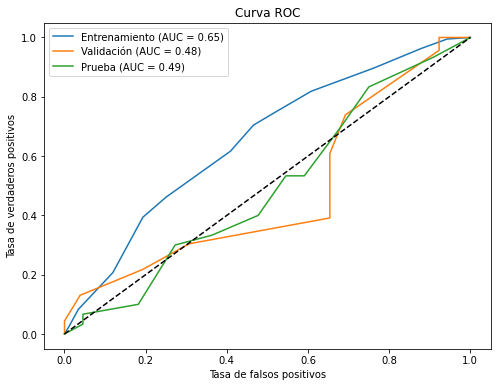

In [58]:
# Obtener el mejor modelo del GridSearchCV
best_knn_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = best_knn_model.predict(X_train)
y_proba_train = best_knn_model.predict_proba(X_train)

# Realizar predicciones en el conjunto de validación
y_pred_valid = best_knn_model.predict(X_valid)
y_proba_valid = best_knn_model.predict_proba(X_valid)

# Realizar predicciones en el conjunto de prueba
y_pred_test = best_knn_model.predict(X_test)
y_proba_test = best_knn_model.predict_proba(X_test)

# Función para calcular la curva ROC y mostrarla
def display_roc_curve(y_true, y_proba, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba[:, 1])
    auc = roc_auc_score(y_true, y_proba[:, 1])
    plt.plot(fpr, tpr, label=f'{title} (AUC = {auc:.2f})')

# Función para mostrar la matriz de confusión y otras métricas
def display_evaluation_metrics(y_true, y_pred, y_proba, title):
    print(f'\nConjunto de {title}:')
    print('Matriz de confusión:')
    print(confusion_matrix(y_true, y_pred))
    print('Exactitud:', accuracy_score(y_true, y_pred))
    print('Precisión:', precision_score(y_true, y_pred))
    print('Sensibilidad (Recall):', recall_score(y_true, y_pred))
    print('Especificidad:', recall_score(y_true, y_pred, pos_label=0))
    print('AUC:', roc_auc_score(y_true, y_proba[:, 1]))

# Calcular y mostrar métricas para el conjunto de entrenamiento
display_evaluation_metrics(y_train, y_pred_train, y_proba_train, 'entrenamiento')

# Calcular y mostrar métricas para el conjunto de validación
display_evaluation_metrics(y_valid, y_pred_valid, y_proba_valid, 'validación')

# Calcular y mostrar métricas para el conjunto de prueba
display_evaluation_metrics(y_test, y_pred_test, y_proba_test, 'prueba')

# Mostrar la curva ROC para los tres conjuntos
plt.figure(figsize=(8, 6))
display_roc_curve(y_train, y_proba_train, 'Entrenamiento')
display_roc_curve(y_valid, y_proba_valid, 'Validación')
display_roc_curve(y_test, y_proba_test, 'Prueba')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [59]:
recallE_KN= round(recall_score(y_train, y_pred_train), 3)
recallV_KN = round(recall_score(y_valid, y_pred_valid), 3)
recallT_KN = round(recall_score(y_test, y_pred_test), 3)

In [60]:
print(recallE_KN, recallV_KN, recallT_KN)

0.705 0.522 0.533


# Random forest - ensamble e hiperparametros

In [61]:
#pip install scikit-optimize

In [62]:
#pip install --upgrade scikit-learn scikit-optimize

In [63]:
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define el espacio de búsqueda de hiperparámetros
param_space = {
    'n_estimators': (10, 200),  # Rango de valores para el número de estimadores
    'max_depth': (2, 10),        # Rango de valores para la profundidad máxima del árbol
    'min_samples_split': (2, 20),# Rango de valores para el número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': (1, 10), # Rango de valores para el número mínimo de muestras requeridas para estar en un nodo hoja
}

# Inicializa el modelo de clasificación
rf = RandomForestClassifier(random_state=42)

# Inicializa el BayesSearchCV con el modelo y el espacio de búsqueda de hiperparámetros
bayes_cv = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=50,    # Número de iteraciones para la búsqueda
    cv=StratifiedKFold(n_splits=5),  # Validación cruzada estratificada
    scoring='accuracy',  # Métrica de evaluación
    random_state=42
)

# Realiza la búsqueda de hiperparámetros utilizando el conjunto de entrenamiento
bayes_cv.fit(X_train, y_train)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(bayes_cv.best_params_)

# Evalúa el modelo con los mejores hiperparámetros en el conjunto de prueba
y_pred = bayes_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_proba = bayes_cv.predict_proba(X_test)
print("Exactitud en el conjunto de prueba:", accuracy)


Mejores hiperparámetros encontrados:
OrderedDict([('max_depth', 7), ('min_samples_leaf', 1), ('min_samples_split', 17), ('n_estimators', 39)])
Exactitud en el conjunto de prueba: 0.7702702702702703



Métricas para el conjunto de entrenamiento:
Matriz de confusión:
[[146  30]
 [ 14 179]]

Exactitud: 0.8807588075880759
Precisión: 0.8564593301435407
Sensibilidad (Recall): 0.927461139896373
Especificidad: 0.8295454545454546
AUC: 0.9563707018370231


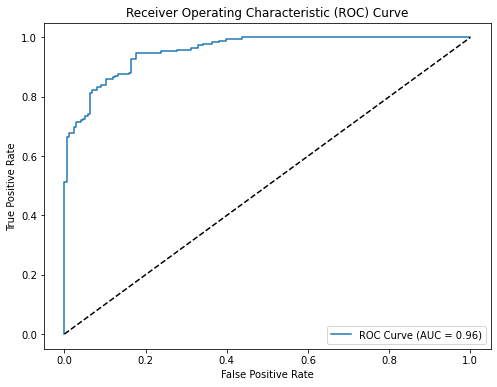


Métricas para el conjunto de validación:
Matriz de confusión:
[[20  6]
 [ 5 18]]

Exactitud: 0.7755102040816326
Precisión: 0.75
Sensibilidad (Recall): 0.782608695652174
Especificidad: 0.7692307692307693
AUC: 0.826086956521739


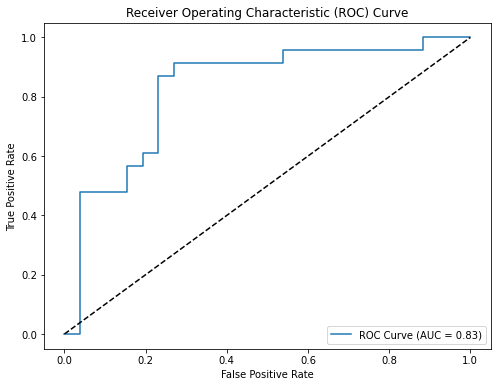


Métricas para el conjunto de prueba:
Matriz de confusión:
[[32 12]
 [ 5 25]]

Exactitud: 0.7702702702702703
Precisión: 0.6756756756756757
Sensibilidad (Recall): 0.8333333333333334
Especificidad: 0.7272727272727273
AUC: 0.853030303030303


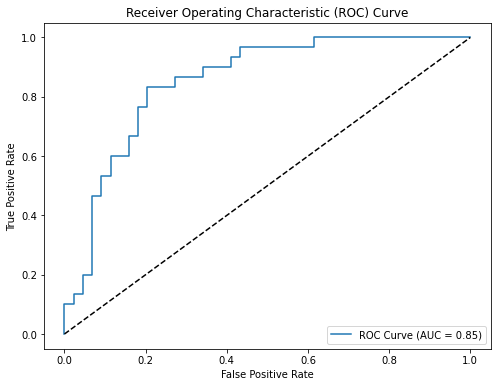

In [64]:
# Matriz de confusión
def display_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print("Matriz de confusión:")
    print(cm)

# Métricas de evaluación
def display_evaluation_metrics(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba[:, 1])
    print("\nExactitud:", accuracy)
    print("Precisión:", precision)
    print("Sensibilidad (Recall):", recall)
    print("Especificidad:", recall_score(y_true, y_pred, pos_label=0))
    print("AUC:", roc_auc)

# Curva ROC
def display_roc_curve(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_true, y_proba[:, 1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Calcular y mostrar métricas para el conjunto de prueba
print("\nMétricas para el conjunto de entrenamiento:")
display_confusion_matrix(y_train, bayes_cv.predict(X_train))
display_evaluation_metrics(y_train, bayes_cv.predict(X_train), bayes_cv.predict_proba(X_train))
display_roc_curve(y_train,  bayes_cv.predict_proba(X_train))

# Calcular y mostrar métricas para el conjunto de validación
print("\nMétricas para el conjunto de validación:")
display_confusion_matrix(y_valid, bayes_cv.predict(X_valid))
display_evaluation_metrics(y_valid, bayes_cv.predict(X_valid), bayes_cv.predict_proba(X_valid))
display_roc_curve(y_valid,  bayes_cv.predict_proba(X_valid))

# Calcular y mostrar métricas para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
display_confusion_matrix(y_test, bayes_cv.predict(X_test))
display_evaluation_metrics(y_test, bayes_cv.predict(X_test), bayes_cv.predict_proba(X_test))
display_roc_curve(y_test, bayes_cv.predict_proba(X_test))

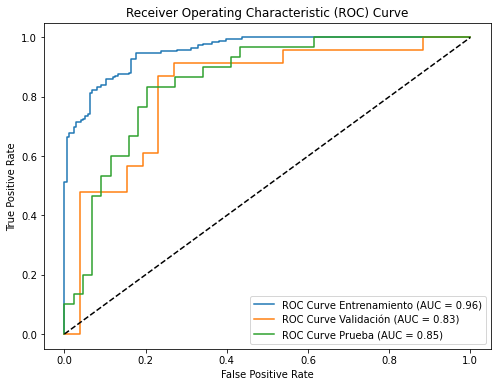

In [65]:
# Curva ROC para múltiples conjuntos de datos
def display_roc_curve_multi(y_true_list, y_proba_list, labels):
    plt.figure(figsize=(8, 6))
    for y_true, y_proba, label in zip(y_true_list, y_proba_list, labels):
        fpr, tpr, thresholds = roc_curve(y_true, y_proba[:, 1])
        plt.plot(fpr, tpr, label='ROC Curve {} (AUC = {:.2f})'.format(label, roc_auc_score(y_true, y_proba[:, 1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Llamada a la función para mostrar la curva ROC para los conjuntos de entrenamiento, validación y prueba
display_roc_curve_multi([y_train, y_valid, y_test], [bayes_cv.predict_proba(X_train), bayes_cv.predict_proba(X_valid), bayes_cv.predict_proba(X_test)], ['Entrenamiento', 'Validación', 'Prueba'])


In [66]:
recall_train = recall_score(y_train, bayes_cv.predict(X_train))
recall_valid = recall_score(y_valid, bayes_cv.predict(X_valid))
recall_test = recall_score(y_test, bayes_cv.predict(X_test))

recallE_RF = round(recall_train, 3)
recallV_RF = round(recall_valid, 3)
recallT_RF = round(recall_test, 3)

In [67]:
print(recallE_RF, recallV_RF, recallT_RF)

0.927 0.783 0.833


# xgboost - Nuevo - ensamble

In [68]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.7702702702702703
Precision: 0.6756756756756757
Recall: 0.8333333333333334
F1-score: 0.746268656716418

Métricas para el conjunto de entrenamiento:
Matriz de confusión:
[[176   0]
 [  0 193]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC: 1.0

Métricas para el conjunto de validación:
Matriz de confusión:
[[20  6]
 [ 5 18]]
Accuracy: 0.7755102040816326
Precision: 0.75
Recall: 0.782608695652174
F1-score: 0.7659574468085106
AUC: 0.8511705685618729

Métricas para el conjunto de prueba:
Matriz de confusión:
[[32 12]
 [ 6 24]]
Accuracy: 0.7567567567567568
Precision: 0.6666666666666666
Recall: 0.8
F1-score: 0.7272727272727273
AUC: 0.8356060606060606


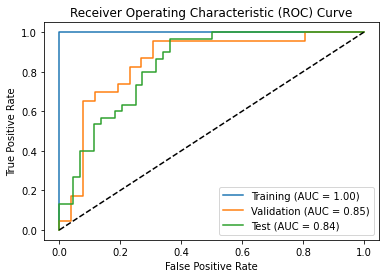

In [69]:
#Importar librerias necesarias
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Inicializar el modelo clasificador de XGBoost
model_xgb = xgb.XGBClassifier()

# Entrenar el modelo
model_xgb.fit(X_train, y_train)
# Realizar predicciones
# Realizar predicciones
y_pred_train = model_xgb.predict(X_train)
y_pred_valid = model_xgb.predict(X_valid)
y_pred_test = model_xgb.predict(X_test)
# Obtener probabilidades para la curva ROC
y_proba_train = model_xgb.predict_proba(X_train)
y_proba_valid = model_xgb.predict_proba(X_valid)
y_proba_test = model_xgb.predict_proba(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Definir función para calcular la curva ROC
def display_roc_curve(y_true, y_proba, label):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba[:, 1])
    plt.plot(fpr, tpr, label=label + ' (AUC = {:.2f})'.format(roc_auc_score(y_true, y_proba[:, 1])))

# Calcular y mostrar métricas para el conjunto de entrenamiento
print("\nMétricas para el conjunto de entrenamiento:")
print("Matriz de confusión:")
print(confusion_matrix(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1-score:", f1_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train[:, 1]))
display_roc_curve(y_train, y_proba_train, 'Training')

# Calcular y mostrar métricas para el conjunto de validación
print("\nMétricas para el conjunto de validación:")
print("Matriz de confusión:")
print(confusion_matrix(y_valid, y_pred_valid))
print("Accuracy:", accuracy_score(y_valid, y_pred_valid))
print("Precision:", precision_score(y_valid, y_pred_valid))
print("Recall:", recall_score(y_valid, y_pred_valid))
print("F1-score:", f1_score(y_valid, y_pred_valid))
print("AUC:", roc_auc_score(y_valid, y_proba_valid[:, 1]))
display_roc_curve(y_valid, y_proba_valid, 'Validation')

# Calcular y mostrar métricas para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1-score:", f1_score(y_test, y_pred_test))
print("AUC:", roc_auc_score(y_test, y_proba_test[:, 1]))
display_roc_curve(y_test, y_proba_test, 'Test')

# Mostrar la curva ROC para los tres conjuntos
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [70]:
# Calcular y mostrar métricas para cada conjunto y guardar el recall
recall_train = recall_score(y_train, y_pred_train)
recall_valid = recall_score(y_valid, y_pred_valid)
recall_test = recall_score(y_test, y_pred_test)

recallE_XG = round(recall_train, 3)
recallV_XG = round(recall_valid, 3)
recallT_XG = round(recall_test, 3)

In [71]:
print(recallE_XG, recallV_XG, recallT_XG)

1.0 0.783 0.8


## 6.2

Se está hablando de un contexto médico donde no se quiere clasificar a una persona enferma como sana pues este error le puede costar la vida. De esta manera, se quiere minimizar los Falsos negativos, el cual es el objetivo de la medida de recall, con la siguiente tabla se puede verificar el conjunto con el valor más alto.

## 6.3

In [72]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
from prettytable import PrettyTable

In [74]:
# Crear el DataFrame para la tabla Entrenamiento
dataE = {
    'Modelo': ['Regresión Categórica', 'KNN', 'Random Forest', 'Xgboost'],
    'Recall': [recallE_RC, recallE_KN, recallE_RF, recallE_XG]
}

df_recallE = pd.DataFrame(dataE)

# Crear la tabla para Entrenamiento con bordes
tablaE = PrettyTable()
tablaE.field_names = df_recallE.columns
for _, row in df_recallE.iterrows():
    tablaE.add_row(row)

# Mostrar la tabla para Entrenamiento
print("Recall del set de entrenamiento de cada modelo")
print(tablaE)

# Crear el DataFrame para la tabla Validación
dataV = {
    'Modelo': ['Regresión Categórica', 'KNN', 'Random Forest', 'Xgboost'],
    'Recall': [recallV_RC, recallV_KN, recallV_RF, recallV_XG]
}

df_recallV = pd.DataFrame(dataV)

# Crear la tabla para Validación con bordes
tablaV = PrettyTable()
tablaV.field_names = df_recallV.columns
for _, row in df_recallV.iterrows():
    tablaV.add_row(row)

# Mostrar la tabla para Validación
print("\nRecall del set de validación de cada modelo")
print(tablaV)

# Crear el DataFrame para la tabla Test
dataT = {
    'Modelo': ['Regresión Categórica', 'KNN', 'Random Forest', 'Xgboost'],
    'Recall': [recallT_RC, recallT_KN, recallT_RF, recallT_XG]
}

df_recallT = pd.DataFrame(dataT)

# Crear la tabla para Test con bordes
tablaT = PrettyTable()
tablaT.field_names = df_recallT.columns
for _, row in df_recallT.iterrows():
    tablaT.add_row(row)

# Mostrar la tabla para Test
print("\nRecall del set de test de cada modelo")
print(tablaT)


Recall del set de entrenamiento de cada modelo
+----------------------+--------+
|        Modelo        | Recall |
+----------------------+--------+
| Regresión Categórica | 0.845  |
|         KNN          | 0.705  |
|    Random Forest     | 0.927  |
|       Xgboost        |  1.0   |
+----------------------+--------+

Recall del set de validación de cada modelo
+----------------------+--------+
|        Modelo        | Recall |
+----------------------+--------+
| Regresión Categórica | 0.783  |
|         KNN          | 0.522  |
|    Random Forest     | 0.783  |
|       Xgboost        | 0.783  |
+----------------------+--------+

Recall del set de test de cada modelo
+----------------------+--------+
|        Modelo        | Recall |
+----------------------+--------+
| Regresión Categórica | 0.767  |
|         KNN          | 0.533  |
|    Random Forest     | 0.833  |
|       Xgboost        |  0.8   |
+----------------------+--------+


## 6.4

Age: 0.3847474939967329
Avg_glucose_level: 0.14551320532544748
Bmi: 0.1162856712158607
Income: 0.11200442525465025
Children: 0.03590990596977943
Married_Yes: 0.02958822626905454
Heart_Disease_1: 0.023359513908072053
Hypertension_1: 0.02329297424334315
Residence_Urban: 0.018543084705962026
Smoking_formerly smoked: 0.017641351495245903
Gender_Male: 0.017109277901298032
Smoking_never smoked: 0.016240320009190356
Work_Self-employed: 0.015821262720602754
Smoking_smokes: 0.014827669747473871
Work_children: 0.01457251913561712
Work_Private: 0.014320365084029873
Gender_Other: 0.00017029795949530713
Work_Never_worked: 5.24350581442771e-05


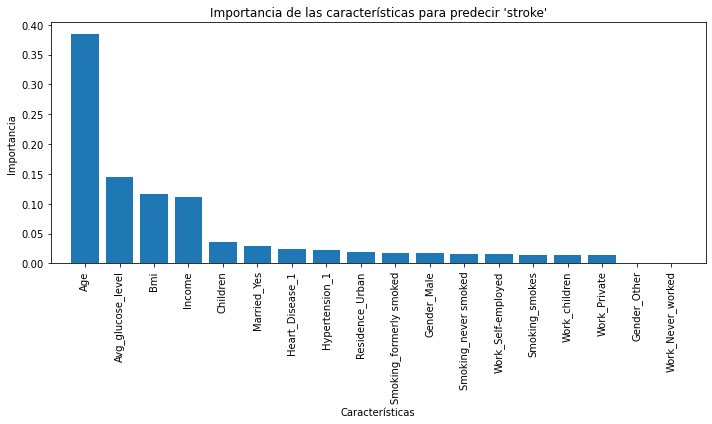

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Variable de respuesta
y = df_undersampled['Stroke_1']

# Eliminamos la variable de respuesta del conjunto de características
X = df_undersampled.drop(columns=['Stroke_1'])

# Creamos el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo
model.fit(X, y)

# Extraemos la importancia de las características
importances = model.feature_importances_

# Ordenamos las importancias de mayor a menor
indices = np.argsort(importances)[::-1]

# Obtener nombres de las características
feature_names = X.columns


# Imprimir los nombres y valores de importancia de las características
for i in range(X.shape[1]):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

# Graficar
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características para predecir 'stroke'")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()


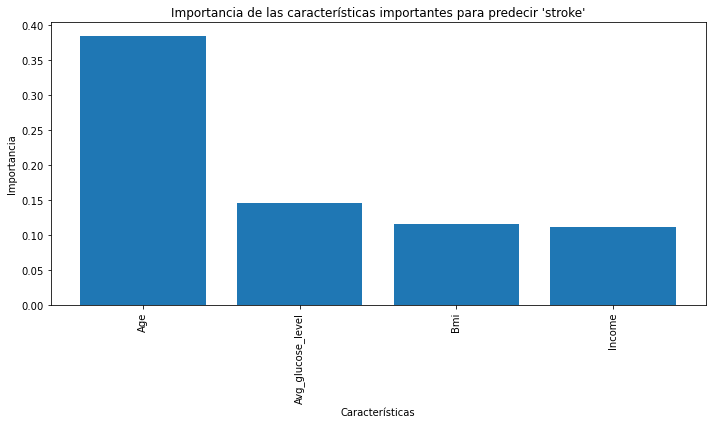

In [79]:
# Ordenar características importantes por importancia
# Filtrar características importantes
caracteristicas_importantes = feature_names[importances >= 0.1]
importancias_importantes = importances[importances >= 0.1]
indices_ordenados = np.argsort(importancias_importantes)[::-1]
caracteristicas_importantes = caracteristicas_importantes[indices_ordenados]
importancias_importantes = importancias_importantes[indices_ordenados]

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(range(len(caracteristicas_importantes)), importancias_importantes, align="center")
plt.xticks(range(len(caracteristicas_importantes)), caracteristicas_importantes, rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de las características importantes para predecir 'stroke'")
plt.tight_layout()
plt.show()

# Bibliografía

- Aristhophane, K., Doffou, J., & Edoété, P. (2020). Method for Automatically Processing Outliers of a Quantitative Variable. Obtenido de International Journal of Advanced Computer Science and Applications,: https://thesai.org/Downloads/Volume11No7/Paper_53-Method_for_Automatically_Processing_Outliers.pdf
- Bengtsson, F., & Lindblad , K. (2020). Methods for handling missing values. Obtenido de UPPSALA UNIVERSITET: https://www.diva-portal.org/smash/get/diva2:1520218/FULLTEXT01.pdf
- Camacho, M., Wilms, M., Almgren, H., Amador, K., Camicioli, R., Ismail, Z., Monchi, O., & Forkert, N. D. (2024). Exploiting macro- and micro-structural brain changes for improved Parkinson’s disease classification from MRI data. Npj Parkinson’s Disease, 10(1). https://doi.org/10.1038/s41531-024-00647-9
- CDC. (17 de Noviembre de 2021). Salud de los pulmones. Obtenido de Centros para el control y la prevención de enfermedades: https://www.cdc.gov/marijuana/health-effects/es/lung-health.html
- EvidentlyAI. (s. f.). Accuracy vs. precision vs. recall in machine learning: what’s the difference? Recuperado 31 de marzo de 2024, de https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall#:~
- Humphries, M. (2015). Missing Data & How to Deal: An overview of missing data. Obtenido de University of Texas: https://minio.la.utexas.edu/webeditor-files/prc/pdf/missing-data.pdf
- Imbalanced Learn. (s. f.). Over-sampling. Recuperado 31 de marzo de 2024, de https://imbalanced-learn.org/stable/over_sampling.html
- Imbalanced Learn. (s. f.). Under-sampling. Recuperado 31 de marzo de 2024, de https://imbalanced-learn.org/stable/under_sampling.html
- InteractiveChaos. (03 de Diciembre de 2018). Comprobación del tipo de las columnas de un dataframe. Obtenido de Interactive Chaos: https://interactivechaos.com/es/python/scenario/comprobacion-del-tipo-de-las-columnas-de-un-dataframe
- Interactivechaos. (16 de Enero de 2021). numpy.nan. Obtenido de Interactivechaos: https://interactivechaos.com/es/python/function/numpynan
- Kocak, B., Kus, E.A. & Kilickesmez, O. How to read and review papers on machine learning and artificial intelligence in radiology: a survival guide to key methodological concepts. Eur Radiol 31, 1819–1830 (2021). https://doi.org/10.1007/s00330-020-07324-4
- Kotsiantis, S., Kanellopoulos, D., & Pintelas, P. (2006). Handling imbalanced datasets: A review. GESTS international transactions on computer science and engineering, 30(1), 25-36.
- Mountassir, A., Benbrahim, H., & Berrada, I. (2012, October). An empirical study to address the problem of unbalanced data sets in sentiment classification. In 2012 IEEE international conference on systems, man, and cybernetics (SMC) (pp. 3298-3303). IEEE.
- Ramyachitra, D., & Manikandan, P. (2014). Imbalanced dataset classification and solutions: a review. International Journal of Computing and Business Research (IJCBR), 5(4), 1-29.
- Saini, M. (2023, 20 junio). Understanding Performance Metrics in Machine Learning: Precision, Recall, F1 Score, Confusion Matrix, and AUC ROC with an example. https://www.linkedin.com/pulse/understanding-performance-metrics-machine-learning-precision-saini#:~